import statements

In [0]:
#Import Statements
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
from heapq import nsmallest

plotting noisy data

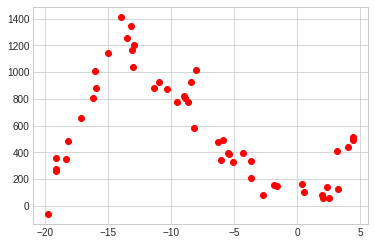

In [5]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples) - 0.8)
y = 5*x+20*x**2+1*x**3 + noise_scale*np.random.randn(number_of_samples)
plt.plot(x,y,'ro')

polynomial fitting using poly1d

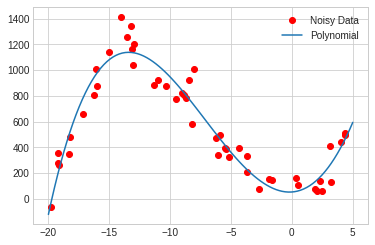

In [6]:
p = np.poly1d(np.polyfit(x,y,4))
q = np.linspace(-20, 5 ,100)
plt.plot(x, y, 'ro', label = 'Noisy Data')
plt.plot(q,p(q),'-',label = 'Polynomial')
plt.legend()
plt.show()

mean square error of polynomial

In [7]:
mse = 0
for i, d in enumerate(x):

  mse = mse + (y[i] - p(d))**2/number_of_samples
  
mse

12171.991291156055

# Polynomial fitting using GA

Create 100 six-element arrays of random numbers

In [8]:
genes = []
for i in range(100):

    genes.append([random.uniform(-5,5) for _ in range(4)])
    
genes = np.asarray(genes)
genes[99]

array([ 2.205808  , -4.84113077, -2.13762672,  3.5581107 ])

Repeat 500 times (or any other number):

For each of the 100 arrays, compute its badness (using all data points) 

Keep the ten best arrays (discard the other 90)

From each array you keep, generate nine new arrays as follows:

Pick a random element of the six
Pick a random floating-point number between 0.0 and 2.0

Multiply the random element of the array by the random floating-point number

pick the best array as your final answer


In [0]:
y_new, badness, best = [0] * 100, [0] * 100, [0] * 100
for _ in range (1000):

  for i in range(100):

    y_new[i]=np.poly1d(genes[i])
    mse = 0

    for j, d in enumerate(x):

      mse += (y[j]-y_new[i](d))**2/number_of_samples
      badness[i]=mse

  badness = np.asarray(badness)
  idx = np.argpartition(badness, 10)
  
  for i in range(0,10):

    best[i*10]=genes[idx[i]]

    for j in range(1,10):

      best[i*10+j]=genes[idx[i]]
      best[i*10+j][random.randint(0,3)]=best[i*10+j][random.randint(0,3)]*random.uniform(0,2)

  best = np.asarray(best)
  genes=best

mse of GA

In [10]:
for i in range(100):

  y_new[i]=np.poly1d(genes[i])
  mse=0

  for k, d in enumerate(x):

    mse += (y[k]-y_new[i](d))**2/number_of_samples
    badness[i]=mse


idx = np.argpartition(badness, 10)
y_new[idx[0]]
badness[idx[0]]

12694.206274387121

plotting noisy data poly1d and GA

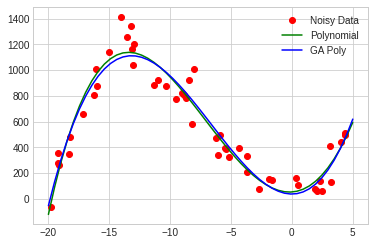

In [12]:
xn = np.linspace(-20, 5, 50)
yn = p(xn)
yn2=y_new[idx[0]](xn)
plt.plot(x,y,'ro',label = 'Noisy Data')
plt.plot(xn,yn, 'g',label = 'Polynomial')
plt.plot(xn,yn2, 'b',label = 'GA Poly')
plt.legend()
plt.show()